# STATS 102
## Class 26

In this class, we will provide an introduction to Scikit-Learn library from chapter 5, section 2 of the "Python Data Science Handbook".  Topics include:

* Data Representation in Scikit-Learn
* Scikit-Learn's Estimator API
* Supervised and Unsupervised Learning Examples

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Introducing Scikit-Learn

During our last five lectures, we've been using the Tensorflow library to implement machine learning algorithms.  However, there are several other Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is [Scikit-Learn](http://scikit-learn.org) and we will introduce you to that today.

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.

This section provides an overview of the Scikit-Learn API and its foundational elements. 

## Data Representation in Scikit-Learn

**Machine learning is about creating models from data**: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.

### Data as table

### A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.

For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [58]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, **we will refer to the rows of the matrix as *samples***, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, **we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.** We also referred to them as input or input vector in previous lectures.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.

**By convention, this features matrix is often stored in a variable named ``X``.**

### The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``.

The samples (i.e., rows) always refer to the individual objects described by the dataset.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

### Target array

In addition to the feature matrix ``X``, we also generally work with a ***label* or *target* array**, which by convention we will usually call ``y``.

**The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.**

The target array may have continuous numerical values, or discrete classes/labels.

While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

## Predicting Flower Species
Let's say we want to construct a model that can predict the species of flower based on the other measurements.  We will use the **iris dataset** to train such model.  The ``species`` column would be considered the target array as that is the quantity we are trying to predict.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


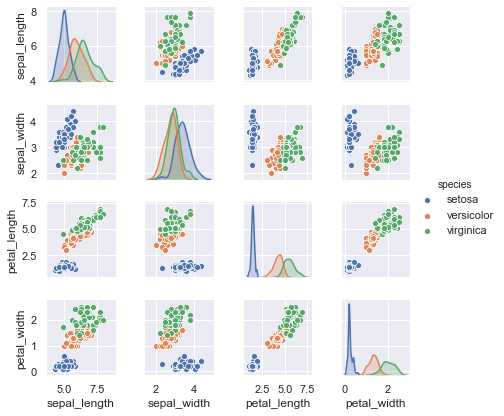

In [59]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

In [60]:
# Creating Input vector (all but "species" column)
X_iris = iris.drop('species', axis=1)
# 150 rows and 4 columns
X_iris.shape

(150, 4)

In [61]:
# Creating Output (labels) vector (use "species" column)
y_iris = iris['species']
# 150 rows
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](figures/05.02-samples-features.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

## Scikit-Learn's Estimator API

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. **Choose** a class of model
2. **Instantiate** model by choosing hyperparameters
3. Arrange data into a input and output vectors
4. **Fit** the model to your data by calling the ``fit()`` method of the model instance.
5. **Predict** by applying the Model to **new** data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

### Supervised learning example: Simple linear regression

Vectors shape (50,) for x and (50,) for y


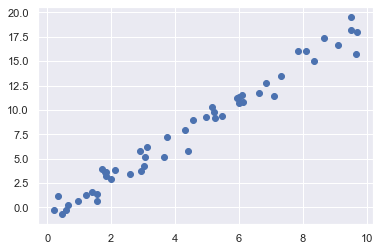

In [62]:
# Let us create our input, output vectors
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
# random values of x
x = 10 * rng.rand(50)
# random value of y
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
print("Vectors shape {} for x and {} for y".format(x.shape, y.shape))

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.

In [64]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

**A class of model is not the same as an instance of a model**

Once we have decided on our model class, there are still some options open to us.

Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

### These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.

In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation (like arguments to a function).

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [65]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.

Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), **but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.**

In [66]:
# In this case, this amounts to a simple reshaping of the one-dimensional 
# array:
print(x.shape)
X = x[:, np.newaxis]
X.shape

(50,)


(50, 1)

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [67]:
# Apply fit method to model instantiation
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [68]:
model.coef_

array([1.9776566])

In [69]:
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

#### 5. Predict labels for unknown data

In Scikit-Learn, this can be done using the ``predict()`` method.

For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [70]:
xfit = np.linspace(-1, 11)
xfit.shape

(50,)

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [71]:
# Add column dimension
Xfit = xfit[:, np.newaxis]
print(Xfit.shape)
yfit = model.predict(Xfit)

(50, 1)


Finally, let's visualize the results by plotting first the raw data, and then this model fit:

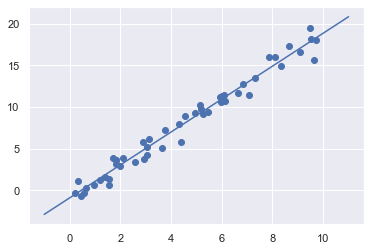

In [72]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

## Back to Predicting Flower Species
### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.

### "Business" question: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.

Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

### Splitting the Data
We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [73]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

### Ready to Predict
With the data arranged, we can follow our recipe to predict the labels:

In [75]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [76]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest, y_model)
print("The model accuracy is {}%".format(np.round(100*acc,2)))

The model accuracy is 97.37%


### With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

## Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the **Iris data is four dimensional**: there are four features recorded for each sample.

### The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.

Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use **principal component analysis** which is a fast linear dimensionality reduction technique.  We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [77]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

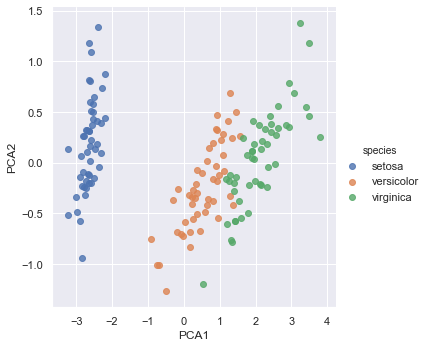

In [78]:
iris['PCA1'] = X_2D[:, 0] # First feature
iris['PCA2'] = X_2D[:, 1] # Second feature
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
### This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## Exploring Hand-written Digits - Scikit style!

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels (unlike the example we reviewed with Tensorflow that wax 28 x 28). Let's visualize the first hundred of these:

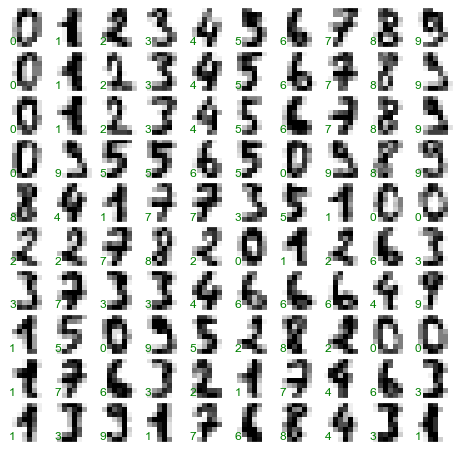

In [80]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

### In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.

We can accomplish this by treating each pixel in the image as a feature: that is, by **flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit (i.e. an input vector of 64 elements).**

Additionally, we need the target array, which gives the previously determined label for each digit.

These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [82]:
X = digits.data
X.shape

(1797, 64)

In [83]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

## Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the **64-dimensional parameter space**, but it's difficult to effectively visualize points in such a high-dimensional space.

### Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a **manifold learning algorithm called *Isomap*** and transform the data to two dimensions:

In [84]:
from sklearn.manifold import Isomap # Choose
iso = Isomap(n_components=2) # Instantiate
iso.fit(digits.data) # Fit
data_projected = iso.transform(digits.data) # Predict
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

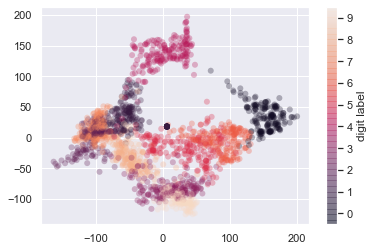

In [85]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.3)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a **Gaussian naive Bayes model**:

In [86]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [89]:
from sklearn.naive_bayes import GaussianNB # Select
model = GaussianNB() # Instantiate
model.fit(Xtrain, ytrain) # Fit
y_model = model.predict(Xtest) # Predict

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [90]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest, y_model)
print("The model accuracy is {}%".format(np.round(100*acc,2)))

The model accuracy is 83.33%


### With even this extremely simple model, we find about 80% accuracy for classification of the digits!

## In Summary...

* We have covered the essential features of the Scikit-Learn data representation, and the estimator API.

* Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.

Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.